In [ ]:
!unzip drive/MyDrive/archive\ \(1\).zip

Archive:  drive/MyDrive/archive (1).zip
replace Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.64133000_1519374442_forest_deep.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.72918000_1559733279_forests1_gettyimages_.jpg  
  inflating: Dataset/Dataset/test_set/forest/0.98884800_1554454572_spin.jpg  
  inflating: Dataset/Dataset/test_set/forest/01_NeilBurnell_Mystical_photoverticall.jpg  
  inflating: Dataset/Dataset/test_set/forest/091318_LH_forest_loss_main_FREE.jpg  
  inflating: Dataset/Dataset/test_set/forest/1009821.jpg  
  inflating: Dataset/Dataset/test_set/forest/111188170_river_in_the_mountain_forest.jpg  
  inflating: Dataset/Dataset/test_set/forest/1170x500_Ireland_web.jpg  
  inflating: Dataset/Dataset/test_set/forest/1200px_Mountainarea.jpg  
  inflating: Dataset/Dataset/te

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras

In [ ]:
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,rotation_range=180,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
x_train=train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Dataset/train_set',
                                          target_size=(128,128),batch_size=32,class_mode='binary')

Found 436 images belonging to 2 classes.


In [ ]:
x_test=test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set',
                                        target_size=(128,128),batch_size=32,class_mode='binary')

Found 121 images belonging to 2 classes.


In [ ]:
# MODEL BUILDING
#to define the linear Initialisation import sequential
from keras.models import Sequential
#to add layers import Dense
from keras.layers import Dense
#to create Convolutional kernel import convolution2D
from keras.layers import Convolution2D
#import Maxpooling layer 
from keras.layers import MaxPooling2D
#import flatten layer
from keras.layers import Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model=Sequential()


In [ ]:
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
#add maxpooling layers
model.add(MaxPooling2D(pool_size=(2,2)))
#add faltten layer
model.add(Flatten())
#add hidden layers
model.add(Dense(150,activation='relu'))
#add output layer
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer="adam",metrics=["accuracy"])
s=model.fit_generator(x_train,steps_per_epoch=14,epochs=10,validation_data=x_test,validation_steps=4)

Epoch 1/10
14/14 [==============================] - 28s 2s/step - loss: 6.6878 - accuracy: 0.6170 - val_loss: 1.4787 - val_accuracy: 0.5950
Epoch 2/10
14/14 [==============================] - 28s 2s/step - loss: 1.3851 - accuracy: 0.7317 - val_loss: 0.1222 - val_accuracy: 0.9669
Epoch 3/10
14/14 [==============================] - 26s 2s/step - loss: 0.3363 - accuracy: 0.8555 - val_loss: 0.1575 - val_accuracy: 0.9256
Epoch 4/10
14/14 [==============================] - 28s 2s/step - loss: 0.2106 - accuracy: 0.9037 - val_loss: 0.1133 - val_accuracy: 0.9669
Epoch 5/10
14/14 [==============================] - 26s 2s/step - loss: 0.1893 - accuracy: 0.9266 - val_loss: 0.1525 - val_accuracy: 0.9504
Epoch 6/10
14/14 [==============================] - 28s 2s/step - loss: 0.2125 - accuracy: 0.9060 - val_loss: 0.1804 - val_accuracy: 0.9174
Epoch 7/10
14/14 [==============================] - 30s 2s/step - loss: 0.1779 - accuracy: 0.9243 - val_loss: 0.0689 - val_accuracy: 0.9752
Epoch 8/10
14/14 [==

In [ ]:
model.save("forest.h5")

In [ ]:
#import load model from keras.model
from keras.models import load_model
#import image from keras
from tensorflow.keras.preprocessing import image
import numpy as np
#import cv2
import cv2
#load the saved model
model=load_model('forest.h5')
img=image.load_img('/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/forest/0.48007200_1530881924_final_forest.jpg')
x=image.img_to_array(img)
res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
#expand the image shape
x=np.expand_dims(res,axis=0)

In [ ]:
pred=model.predict(x)


1/1 [==============================] - 0s 31ms/step


In [ ]:
pred

array([[0.]], dtype=float32)

In [ ]:
pip install twilio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install playsound

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pygobject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC80f3d03cdbb0f27e31568ed8e2ff4db4'
  auth_token='4ba66c7f9237be0e4582b70246b05586'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18304453233',
      #to number
      to='+919159572761')
  print(message.sid)
  print("Fire detected")
  print("SMS Sent!")
elif pred==1:
  print('No Danger')

Forest fire
SM49917e13e087a18235bae24bc4d5c870
Fire detected
SMS Sent!


In [ ]:
from logging import WARNING
#import opencv library
import cv2
#import numpy
import numpy as np
#import image function from keras
from keras.preprocessing import image
#import load_model from keras
from keras.models import load_model
#import client from twilio API
from twilio.rest import Client
#import playsound package
from playsound import playsound

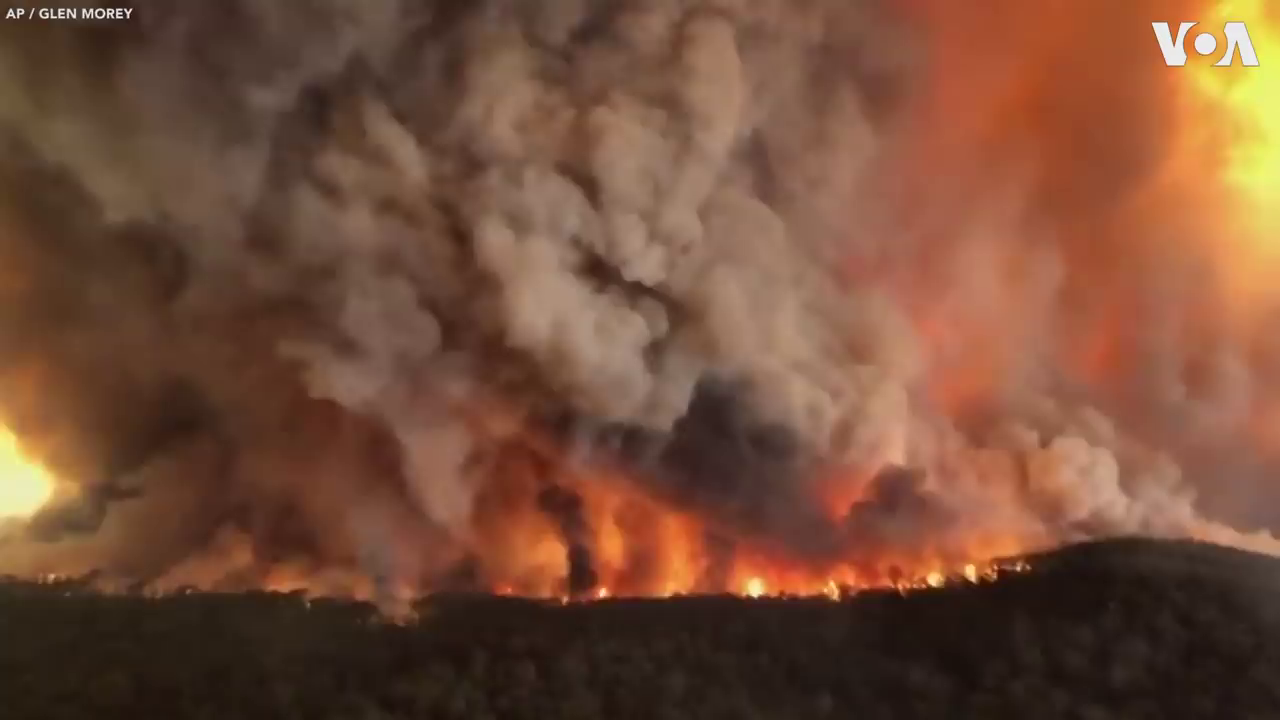

1/1 [==============================] - 0s 106ms/step
Forest fire


<function destroyAllWindows>

In [ ]:
import cv2 
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import librosa
from tensorflow.keras.preprocessing import image
from keras.models import load_model
# Create a VideoCapture object and read from input file
# If the input is the camera, pass 0 instead of the video file name
cap = cv2.VideoCapture('/content/drive/MyDrive/Dataset/Dataset/Dataset/test_set/with fire/vid.mp4')
 
# Check if camera opened successfully
if (cap.isOpened()== False): 
  print("Error opening video stream or file")

# Read until video is completed
while(cap.isOpened()):
  # Capture frame-by-frame
  ret, frame = cap.read()
  if ret == True:
    x=image.img_to_array(frame)
    res=cv2.resize(x,dsize=(128,128),interpolation=cv2.INTER_CUBIC)
    #expand the image shape
    x=np.expand_dims(res,axis=0)
    model=load_model("/content/forest.h5")
    cv2_imshow(frame)
    pred=model.predict(x)
    pred = int(pred[0][0])
    pred
    int(pred)
    if pred==0:
      print('No danger')
      break
    else:
      print("Forest fire")
      break
  # When everything done, release the video capture object
cap.release()
 
# Closes all the frames
cv2.destroyAllWindows

In [ ]:
# SENDING ALERT MESSAGE
from twilio.rest import Client
from playsound import playsound
if pred==0:
  print('Forest fire')
  account_sid='AC80f3d03cdbb0f27e31568ed8e2ff4db4'
  auth_token='4ba66c7f9237be0e4582b70246b05586'
  client=Client(account_sid,auth_token)
  message=client.messages \
  .create(
      body='forest fire is detected,stay alert',
      #use twilio free number
      from_='+18304453233',
      #to number
      to='+919159572761')
  print(message.sid)
  print("No Danger")
  print("SMS Sent!")
elif pred==1:
  print('Fire Detected')

Fire Detected
